# Convolutional Nerual Network 🧠
- Data Augmentation

## Dogs and Cats dataset

- 25,000 images (12500 cats and 12500 dogs)
- Create dataset
  - Training : 1000 samples for each class 
  - Validataion : 500 samples for each class 
  - Test: 500 samples for each class 

In [28]:
# 파일 압출 해제 
!unzip cats_and_dogs_small.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: cats_and_dogs_small/train/cats/cat.333.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.333.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.864.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.864.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.870.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.870.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.680.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.680.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.858.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.858.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.99.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.99.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.694.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.694.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.72.jpg  
  inflating: __MACOS

In [42]:
import os, shutil 

original_db_dir = './train'
base_dir ='./cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [37]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras import models

In [43]:
model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)      

In [48]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### Data Preprocessing 

- ImageDataGenerator 클래스는 디스크에 있는 이미지 파일을 읽어 전처리 된 배치 텐서로 자동으로 바꾸어 주는 파이썬 제너레이터를 만들어줌 

In [44]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [45]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validataion_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode ='binary'
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [46]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기:', data_batch.shape)
  print('배치 레이블 크기:', labels_batch.shape)
  break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [52]:
# 배치 재너레이터를 사용하여 모델 훈련 
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data= validataion_generator,
    validation_steps= 50
)

# 모델저장
model.save('cats_and_dogs_small_1.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 96s 962ms/step - loss: 0.5654 - acc: 0.7100 - val_loss: 0.5779 - val_acc: 0.7230
Epoch 2/30
100/100 [==============================] - 96s 961ms/step - loss: 0.5348 - acc: 0.7320 - val_loss: 0.6763 - val_acc: 0.6080
Epoch 3/30
100/100 [==============================] - 96s 964ms/step - loss: 0.5148 - acc: 0.7510 - val_loss: 0.6128 - val_acc: 0.6690
Epoch 4/30
100/100 [==============================] - 96s 964ms/step - loss: 0.4818 - acc: 0.7590 - val_loss: 0.4410 - val_acc: 0.8040
Epoch 5/30
100/100 [==============================] - 96s 964ms/step - loss: 0.4609 - acc: 0.7845 - val_loss: 0.4753 - val_acc: 0.7700
Epoch 6/30
100/100 [==============================] - 96s 965ms/step - loss: 0.4351 - acc: 0.7970 - val_loss: 0.4853 - val_acc: 0.7700
Epoch 7/30
100/100 [==============================] - 96s 963ms/step - loss: 0.4132 - acc: 0.8125 - val_loss: 0.4645 - val_acc: 0.7760
Epoch 8/30
100/100 [==============================] - 9

* 그래프 그려서 확인하기 

In [55]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs = range(1, len(acc)+1)

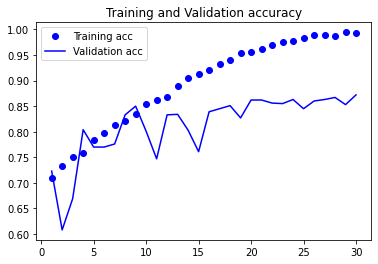

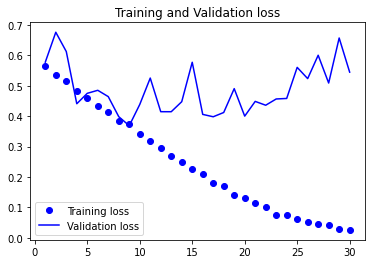

<Figure size 432x288 with 0 Axes>

In [57]:
# accuracy 그래프 
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

# loss 그래프 
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()
plt.show()

## Data Augmentation (데이터 증식)
기존의 데이터에서 적절한 변형을 추가하여 새로운 데이터를 만들어 내는 방법<br>
성능 향상을 시키기 위해 원래 데이터에 랜덤변환을 적용하여 부풀림 
- 장점
  - 다양한 데이터를 입력 시킴으로써 모델을 더욱 견고하게 만들어주기 때문에 테스트 시에 더 높은 성능을 기대 
  - 수집된 데이터가 적을 경우 강력한 힘을 발휘 


In [58]:
datagen = ImageDataGenerator(
    rotation_range=20,                # 임의로 회전 
    width_shift_range=0.1,            # 임의의 크기만큼 너비 방향으로 이동 
    height_shift_range=0.1,           # 임의의 크기만큼 높이 방향으로 이동
    shear_range=0.1,                  # 시계 반대 방향으로 밀림 강도 조절 
    zoom_range=0.1,
    horizontal_flip=True,             # 수평 방향으로 뒤집는다 
    fill_mode='nearest'               # 이미지 변환시에 생기는 픽셀을 채울 방법 결정 
)

#### 데이터 증식 sample 

In [70]:
train_cats_dir = os.path.join(train_dir, 'cats')

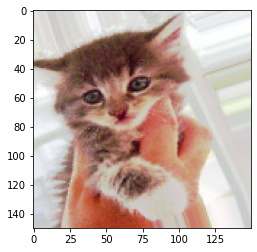

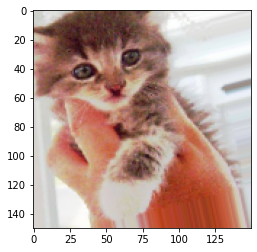

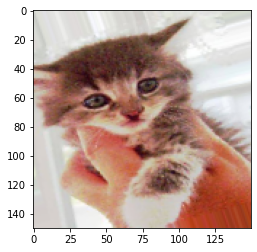

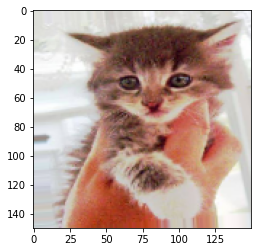

In [73]:
from keras.preprocessing import image 

fnames = sorted([os.path.join(train_cats_dir, fname)for fname in os.listdir(train_cats_dir)])
img_path = fnames[3] # 증식할 이미지 선택 
img = image.load_img(img_path, target_size=(150,150))     # 이미지 읽고 크기 변경 
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0 
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i%4 == 0:
    break 
plt.show()

* 성능향상 후 검증 

In [60]:
model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 128)      

In [61]:
train_datagen = ImageDataGenerator(
    rescale = 1. /255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode ='binary'
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [63]:
model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [69]:
# 모델 훈련 
history = model.fit_generator(
    train_generator,
    steps_per_epoch= train_generator.n// train_generator.batch_size,
    epochs=30,
    validation_data= validataion_generator,
    validation_steps= validation_generator.n//validation_generator.batch_size
)

# 모델저장
model.save('cats_and_dogs_small_2.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
62/62 [==============================] - 104s 2s/step - loss: 0.4342 - acc: 0.7947 - val_loss: 0.4214 - val_acc: 0.8234
Epoch 2/30
62/62 [==============================] - 104s 2s/step - loss: 0.4287 - acc: 0.7998 - val_loss: 0.3489 - val_acc: 0.8581
Epoch 3/30
62/62 [==============================] - 104s 2s/step - loss: 0.4448 - acc: 0.7907 - val_loss: 0.4931 - val_acc: 0.7645
Epoch 4/30
62/62 [==============================] - 104s 2s/step - loss: 0.4432 - acc: 0.7896 - val_loss: 0.4916 - val_acc: 0.7532
Epoch 5/30
62/62 [==============================] - 104s 2s/step - loss: 0.4415 - acc: 0.7927 - val_loss: 0.3833 - val_acc: 0.8290
Epoch 6/30
62/62 [==============================] - 104s 2s/step - loss: 0.4263 - acc: 0.8044 - val_loss: 0.4053 - val_acc: 0.8161
Epoch 7/30
62/62 [==============================] - 104s 2s/step - loss: 0.4267 - acc: 0.8059 - val_loss: 0.4102 - val_acc: 0.8137
Epoch 8/30
62/62 [==============================] - 103s 2s/step - loss: 0.4401 - a

* 그래프로 정확성 확인 

In [74]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs = range(1, len(acc)+1)

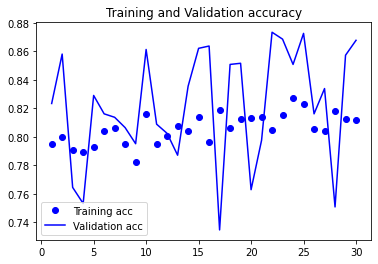

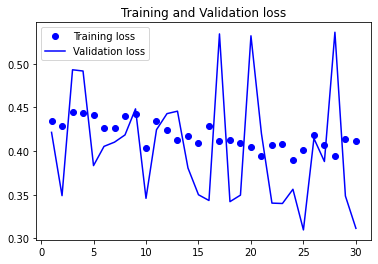

<Figure size 432x288 with 0 Axes>

In [75]:
# accuracy 그래프 
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

# loss 그래프 
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()
plt.show()